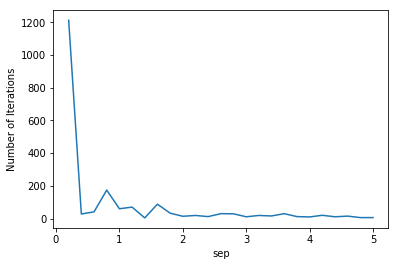

In [3]:
#### CREDITS: Wencen Wu for generation of data####
import numpy as np
import matplotlib.pyplot as plt

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

'''
Q8

'''

def mismatch(X,Y,w):
    #calc mismatch
    for i in range(0,len(X)):
        number = w[0]*X[i][0] + w[1]*X[i][1] + w[2]*X[i][2]
        if number >= 0:
            sign = 1
        else:
            sign = -1

        if Y[i] == sign:
            continue
        else:
            return i
    return i+1
    
def perceptron(top,bottom):
    #convert top and bottom array to X and Y
    X = []
    Y = []
    for i in range(0,len(top)):
        X.append([1]+top[i])
        Y.append(1)
    for j in range(0, len(bottom)):
        X.append([1]+bottom[j])
        Y.append(-1)
    
    #Initialize w
    w = [0.0,0.0,0.0]
    iteration = 0
    while(1):
        iteration+=1
        position = mismatch(X,Y,w)
        #if no mismatch: end
        if(position == len(Y)):
           break
        #w(t+1) = w(t) + y(t).x(t)
        else:
           w[0] = w[0]+X[position][0]*Y[position]
           w[1] = w[1]+X[position][1]*Y[position]
           w[2] = w[2]+X[position][2]*Y[position]
    return w, iteration
'''
Start of program

'''
iteration = []
sep = []
for i in range(0,25):
    top,bottom = generatedata(10,5,(i+1)*0.2,2000)
    w, iter_ = perceptron(top,bottom)
    sep.append((i+1)*0.2)
    iteration.append(iter_)

#Plot graph
plt.plot(sep, iteration)
plt.xlabel('sep')
plt.ylabel('Number of Iterations')
plt.show()